In [16]:
!pip install ultralytics

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
938/938 [==============================] - 51s 52ms/step - loss: 0.1843 - accuracy: 0.9433 - val_loss: 0.0502 - val_accuracy: 0.9835
Epoch 2/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0522 - accuracy: 0.9835 - val_loss: 0.0433 - val_accuracy: 0.9867
Epoch 3/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0364 - accuracy: 0.9881 - val_loss: 0.0374 - val_accuracy: 0.9872
Epoch 4/5
938/938 [==============================] - 44s 47ms/step - loss: 0.0292 - accuracy: 0.9910 - val_loss: 0.0337 - val_accuracy: 0.9897
Epoch 5/5
313/313 [==============================] - 2s 8ms/step - loss: 0.0449 - accuracy: 0.9860
Test Accuracy: 0.9860000014305115
313/313 [==============================] - 2s 7ms/step


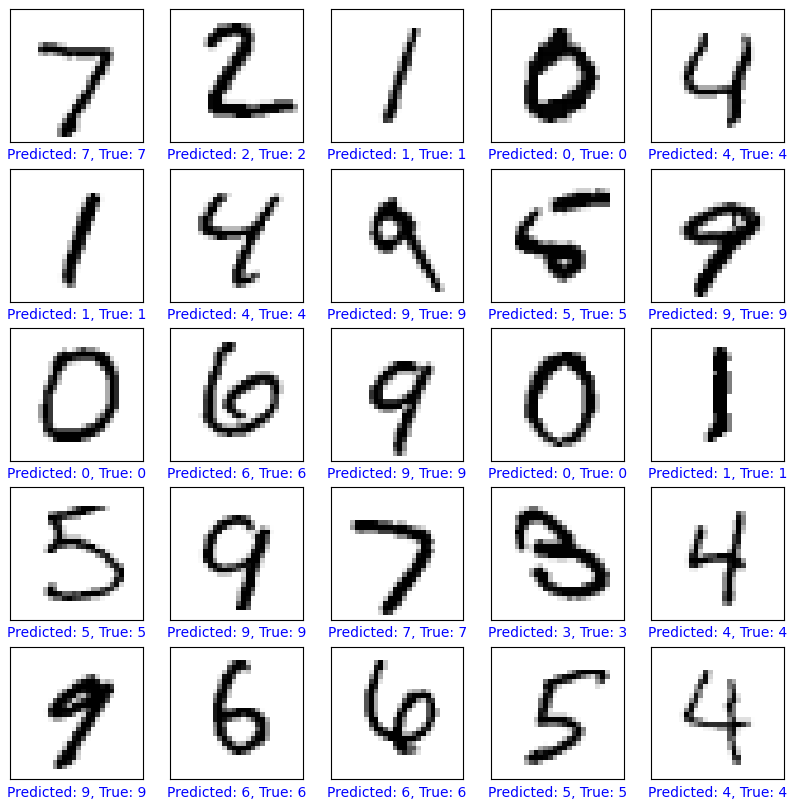

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the MNIST dataset
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
# Reshape data to fit the model
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# One-hot encode the target variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Normalize the pixel values
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Make predictions on test data
predictions = model.predict(X_test)

# Visualize some predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f'Predicted: {predicted_label}, True: {true_label}', color=color)
plt.show()
